<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_3_C2_Multi_Modal_AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing and Installing Required Libraries**

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel

# CPU version of pytorch has smaller footprint - see installation instructions in
# pytorch documentation - https://pytorch.org/get-started/locally/
!pip install torch==1.10.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

!pip install autogluon

     |████████████████████████████████| 2.1 MB 12.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    F

In [ ]:
# installing split-folders library to split the images dataset folders into training, validation and testing folders
!pip install split-folders

In [ ]:
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# !pip install textblob

In [ ]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941188 sha256=5be8066a759be4c1c2a9ed3688866769fd6f04220181e2e262afc36561b2b137
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb558949a28b13470fc74b8
Successfully built langid


In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 31.6 MB/s eta 0:00:00


###**Importing Required Libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing tensorflow, keras and their required modules
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, ZeroPadding2D, Concatenate
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L2

# importing sklearn and their required modules
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# importing nltk and re dependencies
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk.corpus
from nltk.probability import FreqDist
import re

# imorting autogluon and associated dependencies
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
from autogluon.tabular import TabularPredictor
from autogluon.tabular import FeatureMetadata

# importing other required libraries
from tqdm.notebook import tqdm
from gensim.parsing.preprocessing import remove_stopwords
from langid.langid import LanguageIdentifier, model
import glob
import cv2
import skimage
from skimage.transform import resize
import os
import gc
import pickle
import splitfolders
import sys
import seaborn as sns
import PIL
from PIL import Image
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
from io import StringIO
from IPython.display import display

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###**Mounting the Drive**

In [ ]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' -> '/content/Dataset'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE' -> '/content/Dataset/ADVE'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000136188.jpg' -> '/content/Dataset/ADVE/0000136188.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0030048095.jpg' -> '/content/Dataset/ADVE/0030048095.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000556056.jpg' -> '/content/Dataset/ADVE/0000556056.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04106546.jpg' -> '/content/Dataset/ADVE/04106546.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04102204.jpg' -> '/content/Dataset/ADVE/04102204.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04412344.jpg' -> '/content/Dataset/ADVE/04412344.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project

In [ ]:
# importing the dataframe
imgpath_text_df = pd.read_csv('/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df.csv')
display(imgpath_text_df)

,label,path,text,clean_text
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...
...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...


In [ ]:
# checking NaNs and replacing any with ' ' string
print('Number of NaN values in clean_text column:\n',imgpath_text_df['clean_text'].isnull().sum())

# filling NaNs with ' '
imgpath_text_df.fillna(' ', inplace=True)

# viewing NaNs again
print('Number of NaN values in clean_text column after replacing:\n',imgpath_text_df['clean_text'].isnull().sum())

Number of NaN values in clean_text column:
 21
Number of NaN values in clean_text column after replacing:
 0


##**Detecting the language of all text**

In [ ]:
# now we will detect the language for each row
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
imgpath_text_df['language'] = [identifier.classify(text)[0] for text in imgpath_text_df['clean_text']]
imgpath_text_df['lang_prob'] = [identifier.classify(text)[1] for text in imgpath_text_df['clean_text']]
display(imgpath_text_df)

,label,path,text,clean_text,language,lang_prob
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,br,0.965464
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,gl,0.910893
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.000000
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.000000
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.000000
...,...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,en,1.000000
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,en,1.000000
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,en,1.000000
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,en,1.000000


In [ ]:
# viewing value counts for language column
display(imgpath_text_df['language'].value_counts())

en    3306
la      42
de      39
br      13
lb      13
fr      11
es      10
nl       9
an       9
af       8
tl       6
cy       5
it       5
ro       2
ht       2
da       2
bs       1
gl       1
sl       1
eo       1
pl       1
sq       1
id       1
no       1
zu       1
sv       1
Name: language, dtype: int64

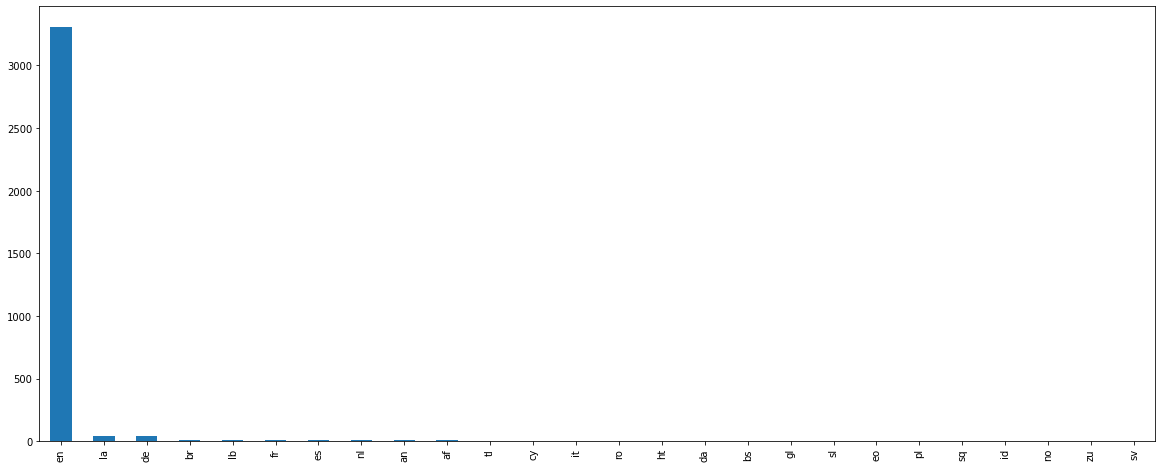

In [ ]:
# viewing value counts for language column
imgpath_text_df['language'].value_counts().plot(kind='bar', figsize=(20,8))


For Note:



en    159
af      5
de      5
br      4
an      4
lb      4
es      3
la      2
fr      2
nl      2
cy      2
it      2
id      1
pl      1
sq      1
sl      1
gl      1
bs      1
eo      1
ro      1
Name: language, dtype: int64


For Form:



en    368
de     26
la     13
lb      7
an      5
br      4
nl      3
fr      3
no      1
es      1
zu      1
Name: language, dtype: int64


For Email:



en    592
la      2
tl      2
br      2
lb      1
nl      1
Name: language, dtype: int64


For Letter:



en    568
Name: language, dtype: int64


For News:



en    161
la     15
fr      3
cy      2
de      2
it      2
es      2
tl      1
br      1
Name: language, dtype: int64


For ADVE:



en    202
la      6
es      4
tl      3
nl      3
af      2
ht      2
da      2
br      2
ro      1
cy      1
fr      1
lb      1
it      1
Name: language, dtype: int64


For Memo:



en    620
de      1
Name: language, dtype: int64


For Resume:



en    120
de      1
Name: language, dtype: int64


For Scientific:



en    254
de      3
fr      2
af      1
sv      1
la      1
Name: language, dtype: int64


For Report:



en    262
la      3
de      1
Name: language, dtype: int64

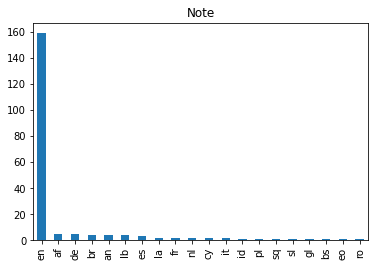

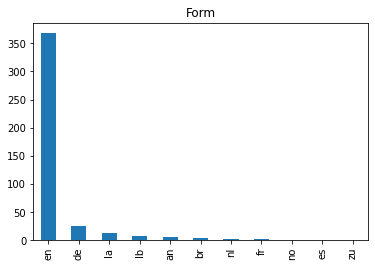

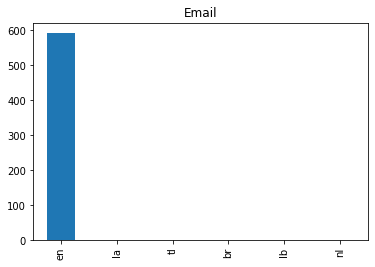

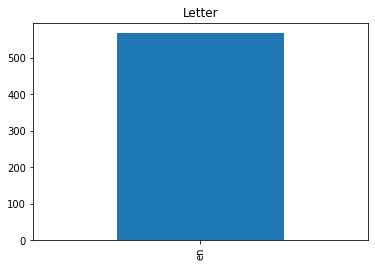

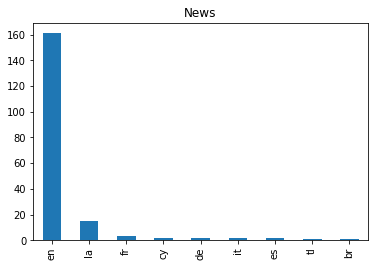

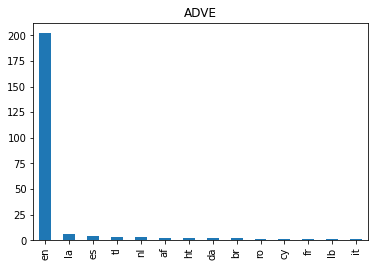

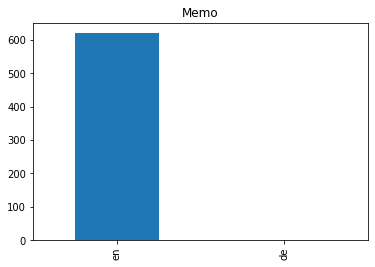

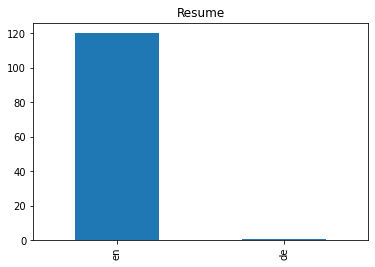

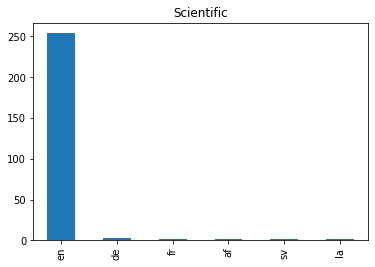

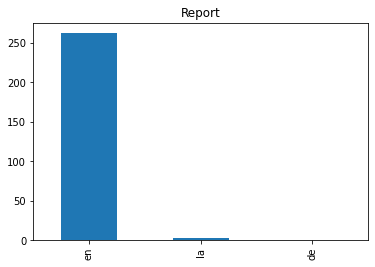

In [ ]:
# viewing the distribution of languages for each label

for label in list(imgpath_text_df['label'].unique()):
  print('\nFor '+label+':\n')
  temp_df = imgpath_text_df[imgpath_text_df['label']==label]
  plt.figure()
  display(temp_df['language'].value_counts())
  temp_df['language'].value_counts().plot(kind='bar',title=label)

**Since the dataset contains mixed languages and there share is not significant, I will be removing those columns**

In [ ]:
# filtering the dataset to get only images with english text
imgpath_text_df_en = imgpath_text_df[imgpath_text_df['language']=='en'].copy()

# viewing the first five rows
display(imgpath_text_df_en.head())

# confirming that the filtering was done properly
display(imgpath_text_df_en['language'].value_counts())

,label,path,text,clean_text,language,lang_prob
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0


en    3306
Name: language, dtype: int64

##**Removing StopWords and Words less than 3 characters**

In [ ]:
imgpath_text_df_en['clean_text_without_stopwords'] = [remove_stopwords(text) for text in imgpath_text_df_en['clean_text']]
imgpath_text_df_en['clean_text_without_stopwords'] = [re.sub(r'\b\w{1,3}\b', "",text) for text in imgpath_text_df_en['clean_text_without_stopwords']]
display(imgpath_text_df_en.head())

,label,path,text,clean_text,language,lang_prob,clean_text_without_stopwords
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,en,1.0,cane cirneten tharjen thew dete p...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,en,1.0,produc site health policy center batta g...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,en,1.0,slzese stupts cover froo lavwel agase qe...
6,Note,/content/Dataset/Note/0000007194.jpg,\n\nCeol Cll\n\nSy [CCK boi\n\n10/9 JO5\nchan...,ceol cll sy cck boi jo chance hos recordive ch...,en,1.0,ceol chance recordive cork radel seen...
8,Note,/content/Dataset/Note/2064984702.jpg,\n\n \n\nPAULA DESEL\n{0-23.98\n\npy PE ayes\...,paula desel py pe ayes hate gst ee fxr upc lo ...,en,1.0,paula desel ayes hate clei lonkvacts ...


##**Preparing Final DataFrame with Text, Image_Path and Labels**

In [ ]:
final_df = imgpath_text_df_en[['label','path','clean_text_without_stopwords']].copy()
final_df.rename(columns = {'label':'Category', 'clean_text_without_stopwords':'Text'}, inplace = True)
final_df.head()

,Category,path,Text
2,Note,/content/Dataset/Note/10384492.jpg,cane cirneten tharjen thew dete p...
3,Note,/content/Dataset/Note/71460901.jpg,produc site health policy center batta g...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,slzese stupts cover froo lavwel agase qe...
6,Note,/content/Dataset/Note/0000007194.jpg,ceol chance recordive cork radel seen...
8,Note,/content/Dataset/Note/2064984702.jpg,paula desel ayes hate clei lonkvacts ...


In [ ]:
final_df['Labels'] = final_df['Category'].map({'Form': 0, 'ADVE': 1, 'Memo': 2, 'Letter': 3, 'Resume': 4, 'Note': 5, 'Email': 6, 'Scientific': 7, 'Report': 8, 'News': 9 })

final_df.head()

,Category,path,Text,Labels
2,Note,/content/Dataset/Note/10384492.jpg,cane cirneten tharjen thew dete p...,5
3,Note,/content/Dataset/Note/71460901.jpg,produc site health policy center batta g...,5
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,slzese stupts cover froo lavwel agase qe...,5
6,Note,/content/Dataset/Note/0000007194.jpg,ceol chance recordive cork radel seen...,5
8,Note,/content/Dataset/Note/2064984702.jpg,paula desel ayes hate clei lonkvacts ...,5


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(final_df[['path','Text','Labels']],final_df['Category'],test_size=0.25,random_state=42)

In [ ]:
feature_metadata = FeatureMetadata.from_df(x_train)
print(feature_metadata)

('int', [])          : 1 | ['Labels']
('object', [])       : 1 | ['path']
('object', ['text']) : 1 | ['Text']


In [ ]:
feature_metadata = feature_metadata.add_special_types({'path': ['image_path']})
print(feature_metadata)

('int', [])                : 1 | ['Labels']
('object', ['image_path']) : 1 | ['path']
('object', ['text'])       : 1 | ['Text']


In [ ]:
hyperparameters = get_hyperparameter_config('multimodal')
print(hyperparameters)

{'NN_TORCH': {}, 'GBM': [{}, {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, 'GBMLarge'], 'CAT': {}, 'XGB': {}, 'AG_TEXT_NN': {'presets': 'medium_quality_faster_train'}, 'AG_IMAGE_NN': {}, 'VW': {}}


In [ ]:
predictor = TabularPredictor(label='Labels').fit( train_data=x_train, hyperparameters=hyperparameters, feature_metadata=feature_metadata, time_limit=900)

No path specified. Models will be saved in: "AutogluonModels/ag-20220430_204201/"
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20220430_204201/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    2479
Train Data Columns: 2
Label Column: Labels
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	10 unique label values:  [0, 2, 6, 7, 3, 1, 5, 8, 9, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 10
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10313.82 MB
	Train Data (Original)  Memory Usage: 2.78 MB (0.0% of availa

In [ ]:
leaderboard = predictor.leaderboard(x_test)

                 model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             LightGBM    0.833132   0.792339        0.259906       0.076341   11.244128                 0.259906                0.076341          11.244128            1       True          1
1  WeightedEnsemble_L2    0.829504   0.800403        0.461508       0.126593   17.406969                 0.012662                0.000445           0.192944            2       True          7
2           LightGBMXT    0.828295   0.798387        0.389380       0.105887    7.644133                 0.389380                0.105887           7.644133            1       True          2
3             CatBoost    0.825877   0.794355        0.206487       0.095260  194.434483                 0.206487                0.095260         194.434483            1       True          3
4              XGBoost    0.816203   0.7